In [ ]:
import numpy as np
from core import initialize_bodies
from quadtree import Node
from quadtree import Quadtree
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# initialize bodies with random masses, positions, and velocities over set range
# bodies[n] = Body(mass, position [x, y], velocity [vx, vy])
bodies = initialize_bodies(2, mass_range = [1, 10], position_range = [-32, 32], velocity_range = [-5, 5])
positions = [body.position for body in bodies]

QuadTest = Quadtree(bodies, 64)

# function below lists node data. You can use it for debugging

for i in range(len(QuadTest.nodelist)):
    print(f'Node {i} points {QuadTest.nodelist[i].points } nodeposition {QuadTest.nodelist[i].nodeposition} size {QuadTest.nodelist[i].size} CoM {QuadTest.nodelist[i].find_CoM(bodies)}')

Node 0 points [0, 1] nodeposition [0, 0] size 1 CoM (array([10.44752007, 17.65089675]), 10.846044078527349)
Node 1 points [0] nodeposition [-16.0, 16.0] size 2 CoM (array([-10.43528836,   4.08223983]), 4.414227026330911)
Node 2 points [1] nodeposition [16.0, 16.0] size 2 CoM (array([24.77962197, 26.96321575]), 6.431817052196439)
Node 3 points [] nodeposition [-16.0, -16.0] size 2 CoM (None, 0)
Node 4 points [] nodeposition [16.0, -16.0] size 2 CoM (None, 0)


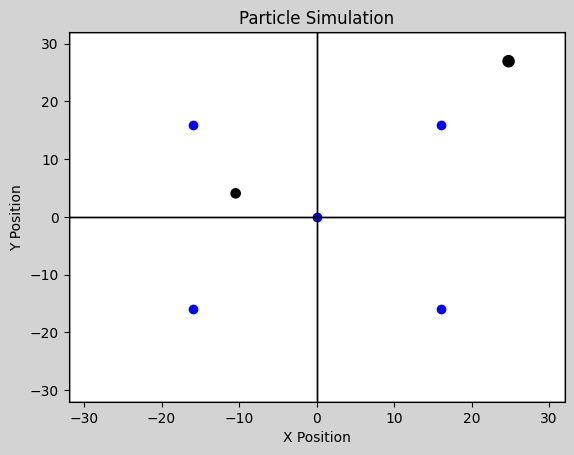

In [2]:
# Example animation using matplotlib

# %matplotlib widget

# Time step for position updates
dt = 0.1

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlim(-32, 32) # X-axis limits
ax.set_ylim(-32, 32) # Y-axis limits
ax.set_title("Particle Simulation", color="black")  # Title
ax.set_xlabel("X Position", color="black")  # X-axis label
ax.set_ylabel("Y Position", color="black")  # Y-axis label
ax.tick_params(axis='x', colors="black")  # X-axis ticks
ax.tick_params(axis='y', colors="black")  # Y-axis ticks
ax.set_facecolor("white")  # Set background color
fig.patch.set_facecolor("lightgray")  # Outside the plot

# Create scatter plot with initial positions
scat = ax.scatter(
    [body.position[0] for body in bodies], # Initial x-coordinate of bodies
    [body.position[1] for body in bodies], # Initial y-coordinate of bodies
    s=[body.mass * 10 for body in bodies], # Size of bodies proportional to mass
    c="black",  # Color of bodies
)

pos1 = []
pos2 = []
for i in range(len(QuadTest.nodelist)):
    pos1.append(QuadTest.nodelist[i].nodeposition[0])
    pos2.append(QuadTest.nodelist[i].nodeposition[1])

scat2 = ax.scatter(pos1, pos2, c='blue')

for i in range(len(QuadTest.nodelist)):
    formatcoords = [QuadTest.nodelist[i].nodeposition[0]-(64/2**(QuadTest.nodelist[i].size)), QuadTest.nodelist[i].nodeposition[1]-(64/2**(QuadTest.nodelist[i].size))]

# If you want to do graphical representations of the quadtree, you need to subtract 1 from the size. It's just kind of a quirk of how i coded it. 
    Rect = patches.Rectangle(formatcoords, (64/2**(QuadTest.nodelist[i].size-1)), (64/2**(QuadTest.nodelist[i].size-1)), ec = 'black', fill =False)
    plt.gca().add_patch(Rect)

# Update function for animation
# def update_position(frame):

#     updated_positions = [] # Initialize as a list

#     for body in bodies:
#         body.position += body.velocity * dt  # Update positions
#         updated_positions.append(body.position)  # Collect new positions
#     scat.set_offsets(updated_positions)  # Update scatter plot
    
#     return scat

# # Create the animation
# ani = animation.FuncAnimation(
#     fig=fig,
#     func=update_position,
#     frames=range(50),  # Number of frames
#     interval=50,  # Time between frames in milliseconds
#     repeat=False,  # Stop after the last frame
# )

# Show the plot
plt.show()

In [3]:
# Force testing
print(f'Body_0 position: {bodies[0].position}')
print(f'Body_0 mass: {bodies[0].mass}')
print(f'Body_1 position: {bodies[1].position}')
print(f'Body_1 mass: {bodies[1].mass}')

print(f'Body_0 force: {bodies[0].force}')
print(f'Body_1 force: {bodies[1].force}')
QuadTest.traverse_quadtree(0,0)
QuadTest.traverse_quadtree(0,1)
print(f'Body_0 force: {bodies[0].force}')
print(f'Body_1 force: {bodies[1].force}')

Body_0 position: [-10.43528836   4.08223983]
Body_0 mass: 4.414227026330911
Body_1 position: [24.77962197 26.96321575]
Body_1 mass: 6.431817052196439
Body_0 force: [0 0]
Body_1 force: [0 0]
Body_0 force: [0.01345098 0.00873981]
Body_1 force: [-0.01345098 -0.00873981]
